Importe os pacotes necessários. Insira nessa célula todos os pacotes Python que serão usados no restante do script

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
# insira aqui seu código


Carrega os dados Fashion MNIST.

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

Abre imagens aleatórias do conjunto de dados para visualização em um grid de tamanho (side x side).

<ipython-input-3-de66bb0fd666>:2: DeprecationWarning: This function is deprecated. Please call randint(0, 60000 + 1) instead
  start = np.random.random_integers(low=0, high=x_train.shape[0], size=(1,))[0]


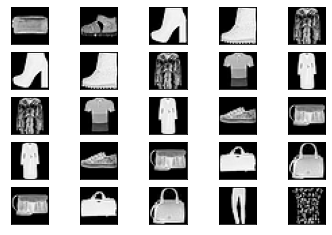

In [ ]:
side = 5
start = np.random.random_integers(low=0, high=x_train.shape[0], size=(1,))[0]
fig, ax = plt.subplots(side, side)
for a in range(side):
    for b in range(side):
        ax[a, b].axes.xaxis.set_visible(False)
        ax[a, b].axes.yaxis.set_visible(False)
        ax[a, b].imshow(x_train[2 * a + b + start, :, :], cmap='gray')
plt.show()

Normaliza os dados para treinamento e validação. Essa célula deve ser preenchida.

In [ ]:
x_train_norm = x_train/255.0 # insira aqui seu código
x_train_norm = np.expand_dims(x_train_norm, axis= -1)
x_test_norm = x_test/255.0 # insira aqui seu código
x_test_norm = np.expand_dims(x_test_norm, axis= -1)
print(x_test_norm.shape, x_train_norm.shape)


(10000, 28, 28, 1) (60000, 28, 28, 1)


Transforma os rótulos das imagens no formato one-hot

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
print(y_test.shape, y_train.shape)

(10000, 10) (60000, 10)


Cria o modelo baseado numa rede neural convolucional. A rede deve possuir uma camada de entrada, uma sequência de camadas convolucionais com os hiper-parâmetros definidos pelo estudante, e uma sequência de camadas densamente conectadas (ou somente uma camada), cuja última camada será de saída, com 10 neurônios.

A função de ativação da última camada deve ser escolhida para que suas saídas sejam valores entre 0 e 1.

O modelo deve ser salvo em uma variável chamada 'model'

In [ ]:

# insira aqui seu código
model = keras.Sequential()
model.add(keras.layers.Conv2D(28, 4,padding='same', input_shape = (28, 28,1)))
model.add(keras.layers.Conv2D(28, 4, activation='relu'))
model.add(keras.layers.MaxPooling2D((4, 4)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(112, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 28)        476       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 28)        12572     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4032)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 112)               451696    
_________________________________________________________________
dropout_1 (Dropout)          (None, 112)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

A próxima célula compila o modelo. O estudante deve escolher a função custo e o algoritmo de optimização.

A função custo deve levar em consideração o fato de que uma amostra não pode ser classificada como pertencente a duas classes simultaneamente, ou seja, as classes são mutuamente exclusivas.

In [ ]:
model.compile(loss='categorical_crossentropy', # insira aqui seu código,
              optimizer="adam", # insira aqui seu código,
              metrics=['accuracy'])

A célula seguinte treina a rede. Insira o número de épocas necessárias para o treinamento efetivo da rede. A acurácia de validação deve ficar acima de 80%.

In [ ]:
model.fit(x_train_norm, y_train,
          epochs=10, # insira aqui seu código,
          validation_data=(x_test_norm,y_test))

Epoch 1/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.4406 - accuracy: 0.8419 - val_loss: 0.3192 - val_accuracy: 0.8833
Epoch 2/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.3059 - accuracy: 0.8883 - val_loss: 0.2830 - val_accuracy: 0.8941
Epoch 3/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2644 - accuracy: 0.9022 - val_loss: 0.2731 - val_accuracy: 0.8977
Epoch 4/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2337 - accuracy: 0.9139 - val_loss: 0.2530 - val_accuracy: 0.9103
Epoch 5/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2110 - accuracy: 0.9202 - val_loss: 0.2657 - val_accuracy: 0.9065
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1931 - accuracy: 0.9269 - val_loss: 0.2716 - val_accuracy: 0.9083
Epoch 7/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1737 - accuracy: 0.9345 - val_loss: 0.2687 -

In [ ]:
results = model.evaluate(x_test_norm, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 1s 5ms/step - loss: 0.2803 - accuracy: 0.9157
test loss, test acc: [0.2803167998790741, 0.9157000184059143]
